# (AI Math 1강) 벡터가 뭐예요?

### 벡터의 특징
1. 벡터는 공간에서 한 점을 나타낸다.
2. 벡터는 원점으로부터 상대적 위치를 표현한다.
3. 벡터에 숫자를 곱해주면 길이만 변한다.(스칼라곱)
4. 벡터는 숫자를 원소로 가지는 List 또는 Array 이다. 
5. 차원이 같으면 덧셈, 뺄셈 그리고 성분곱이 가능하다. (성분곱: elementwise product)
6. 벡터의 덧셈, 뺄셈은 다른 벡터로부터 상대적 위치이동을 표현한다.

### 벡터의 노름(Norm)
1. 벡터의 Norm은 원점에서부터의 거리를 말한다.
2. norm은 L1과 L2로 나뉜다.
3. L1 norm: 각 성분의 변화량의 <b>절대값을 모두 더한 것</b>
4. L2 norm: 피타고라스 정리를 이용한 <b>유클리드 거리를 말함.</b>
5. Norm을 사용해서 두 벡터 사이의 거리를 계산할 수 있다. (벡터의 뺄셈을 이용함)
6. 두 벡터 사이의 거리를 이용하면 각도를 구할 수 있다. <b>(임의의 D차원에서 각도를 구할 수 있기 때문에 L2 Norm을 사용함)</b>
7. 이때 분자를 쉽게 구하는 방법이 내적이다. (inner product)

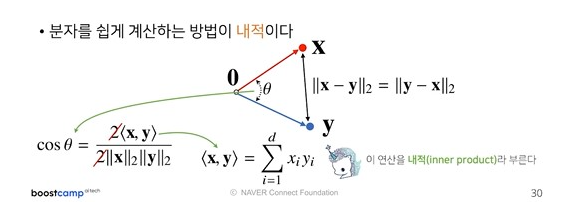

In [3]:
import numpy as np

def l1_norm(x):
    x_norm = np.abs(x)
    x_norm = np.sum(x_norm)
    return x_norm

def l2_norm(x):
    x_norm = x*x
    x_norm = np.sum(x_norm)
    x_norm = np.sqrt(x_norm)
    return x_norm

### 내적은 무엇일까?
1. 정사영(orthogonal projection)된 벡터의 길이와 관련이 있다.
2. Proj(x)는 벡터 y로 정사영된 벡터 x의 그림자라고 보면 된다.
3. Proj(x)의 길이는 코사인법칙으로 계산된다.
4. 내적은 정사영된 벡터를 벡터 y의 길이만큼 조정한 값이다.
5. 내적은 두 벡터의 유사도를 측정하는데 사용된다.

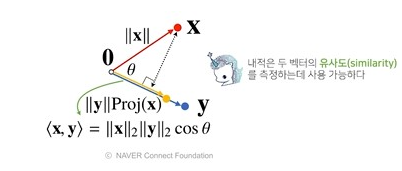

In [1]:
# 각도 구하기
def angle(x, y):
    v = np.inner(x,y) / (l2_norm(x) * l2_norm(y))
    theta = np.arccos(v)
    return theta

# (AI Math 2강) 행렬이 뭐예요?

### 행렬의 곱셈
1. 벡터의 곱셈과 살짝 다름
2. i번째 행 벡터와 j번째 열 벡터 사이의 내적을 함
3. 행렬에서 np.inner 을 사용하면 i와 j의 행벡터 사이의 내적을 하기 때문에 조심해야 함 (넘파이와 수학에서 말하는 내적이 다름)

In [2]:
import numpy as np

x = np.array([[1,2,3], [1,2,3], [1,2,3]])
y = np.array([[0,1], [0,1], [0,1]])

# numpy 에서는 @ 연산을 사용함
# 행 벡터와 열 벡터끼리 내적을 함
x@y

array([[0, 6],
       [0, 6],
       [0, 6]])

In [4]:
# np.inner 를 사용하면 수학에서 말하는 내적과 다른 결과가 나온다.
# 행 벡터끼리 내적을 함
y = np.array([[0,1,-1],[0,1,-1]])
np.inner(x,y)

array([[-1, -1],
       [-1, -1],
       [-1, -1]])

### 행렬의 연산자 역할
1. 행렬곱을 통해 벡터를 다른 차원의 공간으로 보내는 것
2. 벡터 공간에서 사용되는 연산자라고 볼 수 있음.
3. 행렬곱을 통해 패턴을 추출하고 데이터를 압축할 수 있음.
4. 선형 변환
<!-- ![operator](./images/operator.jpg) -->

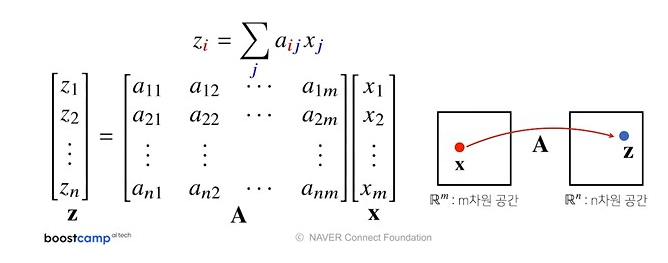

### 역행렬
1. 행과 열 숫자가 같아야 한다.
2. 행렬식(determinant)가 0이 아니어야 한다.

In [7]:
X = np.array([[1,3],[5,2]])
np.linalg.inv(X)

array([[-0.15384615,  0.23076923],
       [ 0.38461538, -0.07692308]])

### 유사 역행렬 (무어-펜로즈 역행렬)
1. 만약 행과 열이 같지 않으면 역행렬을 계산할 수 없음
2. 이때, 유사역행렬을 이용함
3. $A^+$로 표기함
4. 행의 개수가 많을 경우, 열의 개수가 많을 경우에 따라서 수식이 다름
5. 만약 행이 열보다 많으면, 유사역행렬은 원래 행렬보다 먼저 곱해야 항등행렬이 나온다.
6. 유사역행렬을 사용해서 연립방정식의 해를 구할 수 있다.
7. 선형회귀식을 찾을 수 있다. (선형회귀는 보통 행이 열보다 훨씬 많다)


<!-- ![./images/pseudo.jpg](./images/pseudo.jpg) -->

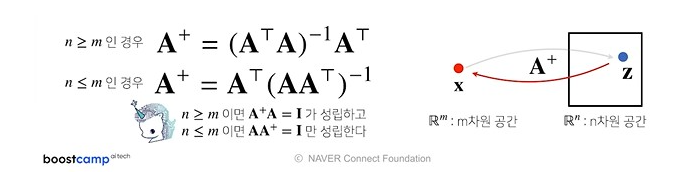

In [12]:
Y = np.array([[0,1], [1,-1], [-2,1]])
print(np.linalg.pinv(Y))
# 항등행렬과 같은 행렬을 계산할 수 있음
# 행이 더 많기 때문에 유사역행렬이 먼저 온다
print(np.linalg.pinv(Y) @ Y)

[[ 5.00000000e-01  1.11022302e-16 -5.00000000e-01]
 [ 8.33333333e-01 -3.33333333e-01 -1.66666667e-01]]
[[ 1.00000000e+00 -2.22044605e-16]
 [ 1.11022302e-16  1.00000000e+00]]


### 유사역행렬을 이용한 선형회귀분석
1. 데이터를 행렬 $X$로 표현
2. coefficient(계수)에 해당하는 $B$(베타)를 곱하게 되면 선형 모델식이 생김
3. 이때 어떤 베타를 써야 빨간 점들을 잘 설명할까?
4. L2-norm을 사용해서 최선의 y를 계산
5. L2-norm을 최소화하는 계수 베타를 찾게 한다

<!-- ![linear.jpg](./images/linear.jpg) -->

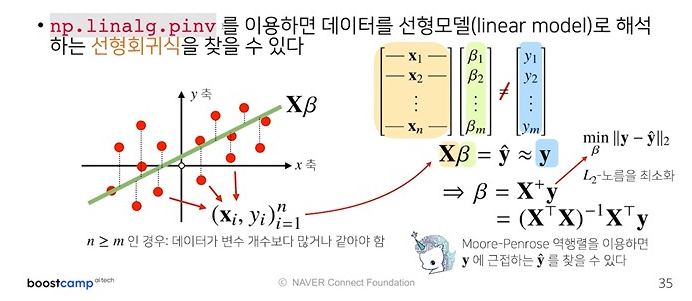

# (AI Math 3, 4강) 경사하강법

### 변수가 하나일 때 (방향이 2 방향)
1. (양수, 음수 상관없이) 미분값을 더하면 함수값이 증가하고, 미분값을 빼면 함수값이 감소한다.
2. 경사상승/경사하강을 통해 극값에 도달하면 움직임을 멈춘다.
3. 미분을 계산하는 함수, 시작점, 학습률, 종료조건을 갖고 있으면 알고리즘을 만들 수 있음

## 변수가 벡터나 행렬인 경우에는? (n차원)
1. 벡터가 입력인 다변수 함수의 경우는 편미분을 사용한다.
2. 특정 방향의 좌표축으로 이동하는 형식으로 미분을 정의할 수 있다.
3. i번째 벡터에만 영향을 주고 나머지에는 변화를 주지 않는다. (단위벡터)

4. <font color=blue>D차원 벡터를 입력으로 가지는 함수면, 편미분을 D번 한다. D번 만큼 편미분을 계산한 함수들을 벡터로 표현할 수 있다. 이를 <b>그레디언트(gradient) 벡터</b>라고 함</font>
5. 그레디언트 벡터를 표시하는 기호로 <b>나블라($\nabla$)</b>를 사용한다.
6. 음수를 붙여서 $-\nabla$가 되면 감소하는 방향을 갖게 된다.
7. 경사하강법은 그대로 적용되지만, 벡터는 절대값 대신에 norm를 계산해서 종료조건과 비교한다.

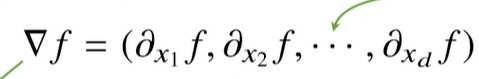

## 경사하강법을 사용한 선형회귀분석
1. 2강에서 무어-펜로즈 방식을 이용해서 선형회귀선을 구했음.
2. 선형회귀의 목적식은 $||y - XB||_2$ 이고, 이를 최소화하는 $B$(계수)를 찾는 것이 목표
3. 목적식 $||y - XB||_2$을 $B$로 미분을 하고, 주어진 $B$에서 미분값을 빼면 된다. (경사하강)
4.  



## SGD (확률적 경사하강법)
1. 데이터를 1개씩 또는 미니배치를 사용해서 업데이트한다
2. Non-convex(볼록이 아닌) 목적식에 사용할 수 있음.
3. 데이터의 일부를 가지고 파라미터를 업데이트하기 때문에 연산자원을 효율적으로 사용할 수 있음 (연산량이 b/n으로 감소)
4. 국소 지점을 탈출할 가능성이 일반 경사하강법보다 높음
5. 미니배치를 가지고 그레디언트 벡터를 계산하고 곡선 모양이(목적식) 바뀐다. (원래 경사하강법과 값은 다를 수 있어도 방향성은 거의 맞다)

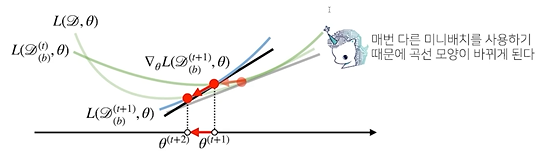

---

# (AI Math 5강) 딥러닝 학습방법 이해하기
- 비선형 모델인 신경망 이해하기
- 활성함수와 역전파 이해하기

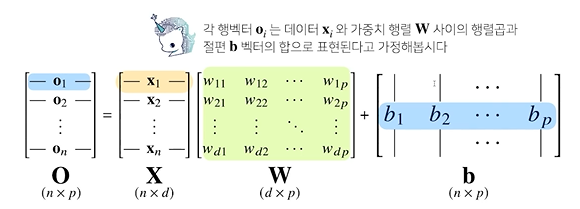

1. 입력 데이터의 차원 $d$ 차원에서 출력 차원의 $p$ 차원으로 바뀐다.
2. 데이터는 n개이므로 $X$는 ($n * d$)행렬이 된다
3. $X$라는 행벡터를 $O$라는 행벡터로 연결할 때, $p$개의 모델을 만드는데, 총 ($p * d$)개 만큼 필요하다. 이게 곧 $W$가중치 행렬이다.

### 소프트맥스 연산
1. 모델의 출력을 확률로 해석할 수 있게 변화해주는 연산이다.
2. 분류 문제를 풀 때, 선형모델과 소프트맥스 함수를 결합해서 예측한다.
3. 지수함수를 통해서 계산하게 된다.
4. 위에서 언급한 $O$ 라는 출력벡터를 소프트맥스 안에 넣으면 확률벡터로 변환이 된다.
5. 위의 과정은 학습이고, 추론 과정에서는 주어진 출력에서 가장 큰 값을 가진 주소만 가져오면 되므로, 원핫인코딩만 하면 된다. (추론에서는 소프트맥스 사용 안함)


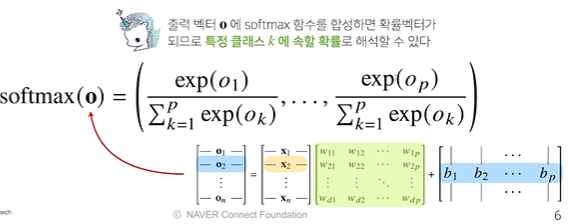

## 활성함수
1. 벡터가 인풋이 아니라, 하나의 실수값을 인풋으로 받는다. (출력도 실수값으로)
2. 선형모델의 출력물을 비선형으로 바꿔줌. (활성함수를 쓰지 않으면 딥러닝은 선형모형과 차이가 없다)
3. 이렇게 변형을 시킨 벡터를, 잠재벡터($H$) = 히든벡터 = 뉴런 이라고 부른다.

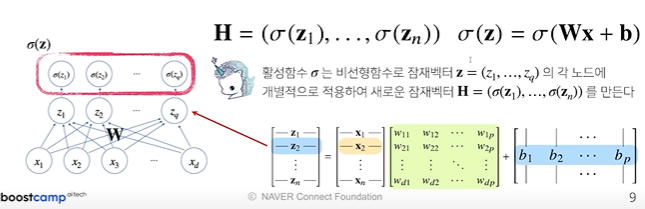

4. 시그모이드, tanh함수, ReLu 함수 등이 있다.
5. 출력이 된 잠재벡터를 다시 입력으로 넣으면서 층을 쌓아간다.
6. **1 ~ L 까지 순차적인 신경망 계산을 순전파(Forward propagation)이라고 한다. (학습이 아니라 출력물을 내뱉는 과정임)**

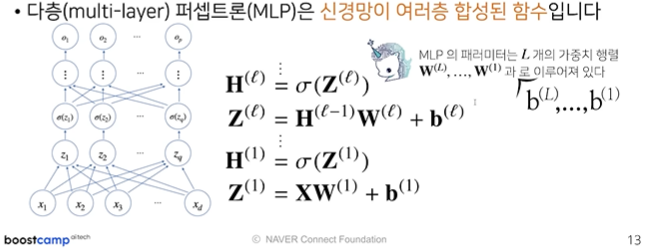

## 역전파 알고리즘 (Back propagation)
1. 각 층에 존재하는 파라미터에 대해 미분해서, 업데이트를 한다.
2. 행렬들의 모든 원소의 개수만큼 경사하강법이 적용된다.
3. 딥러닝은 층별로 쌓아서 계산되어서 역순으로 순차적으로 계산을 해야한다.
4. 합성함수의 미분법인 연쇄법칙을 통해 미분을 계산한다.
5. 미분값을 저장해야 돼서 메모리를 많이 잡아먹게 된다.

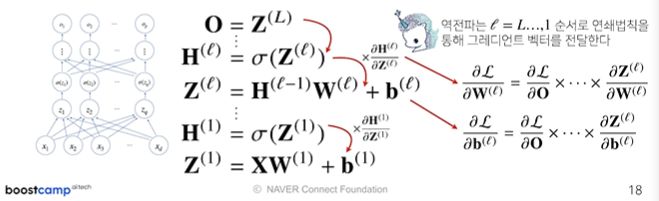